# Default Detection for American Express 

## Mackenzie Carter, Salvador R Sanchez Castro, Viktor Veselov 

### University of San Diego 

### Master of Science, Applied Data Science 

## MADS 502: Data Minning  

 The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories: 
 
$D_*$ = Delinquency variables 

$S_*$ = Spend variables 

$P_*$ = Payment variables 

$B_*$ = Balance variables 

$R_*$ = Risk variables 

with the following features being categorical:  

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 


Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric. 

***

# Section 1 Explore Data

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
import time

In [2]:
#Load Data in Dataframe and verify load time
start_time = time.time()
train_data = pd.read_csv('Train25.csv')
#train_data = pd.read_csv('train_data.csv')

print("--- %s seconds ---" % (time.time() - start_time))
train_data.head()

--- 48.418808937072754 seconds ---


,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,...,NaN,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014
1,1129269,3423938309c0311e273f994fb75c17c051248bec00b142...,2018-02-27,0.692903,0.007248,0.008110,0.813047,0.001296,0.182255,0.008221,...,NaN,NaN,NaN,0.005810,0.007510,0.001479,NaN,0.008584,0.003927,0.000265
2,786878,24830d3e3a6739380c1e4f410cdbc1cccd8670ca4efac5...,2017-10-25,0.760664,0.007164,0.003502,0.816307,0.008692,NaN,0.004170,...,NaN,NaN,NaN,0.004483,0.000421,0.003531,NaN,0.005391,0.001890,0.008278
3,417099,136e58c0698fa15569bbb189ed3f67d4d0773eb1f40475...,2017-07-14,0.541180,0.006883,0.592058,0.043188,0.005739,0.140962,0.009141,...,NaN,NaN,NaN,0.001435,0.003579,0.004951,NaN,0.007757,0.002797,0.000894
4,2559303,7613e081c2fa384bfb6b1df0bab37a0ef29a27cccf5e83...,2017-11-17,0.368668,0.031484,0.453274,0.027807,0.002330,0.263603,0.002230,...,NaN,NaN,NaN,0.006034,0.007786,0.009002,NaN,0.008526,0.003591,0.007756


In [3]:
#Load Data in Dataframe and verify load time
start_time = time.time()
train_labels = pd.read_csv('train_labels.csv')
print("--- %s seconds ---" % (time.time() - start_time))
train_labels.head()

--- 0.5492129325866699 seconds ---


,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [4]:
#Merge training data
train_data = pd.merge(train_data, train_labels, on='customer_ID')
train_data.head()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,...,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014,0
1,4580735,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-06-16,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,...,NaN,NaN,0.001690,0.006082,0.009000,NaN,0.002809,0.002951,0.006065,0
2,4580733,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-04-15,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,...,NaN,NaN,0.007555,0.006555,0.002374,NaN,0.003539,0.002715,0.000628,0
3,4580736,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-07-17,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,...,NaN,NaN,0.008696,0.009739,0.008215,NaN,0.001343,0.008787,0.006253,0
4,4580732,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-03-17,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,...,NaN,NaN,0.003995,0.003113,0.009419,NaN,0.009438,0.000763,0.003817,0


In [5]:
#Define y (Target)
y = pd.DataFrame(train_data[['target']])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [6]:
#Drop target
train_data = train_data.drop(columns=['target'])

In [7]:
#df Shape
train_data.shape

(1382862, 191)

In [8]:
#Data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Columns: 191 entries, Unnamed: 0 to D_145
dtypes: float64(185), int64(2), object(4)
memory usage: 2.0+ GB


## Work with Non Numerical Data

In [9]:
#function for extracting objects
def getObjectCol(df):
    DType = ['object']
    df = df.select_dtypes(include=DType)
        
    return df

In [10]:
#function for extracting numerical
def getNumericCol(df):
    DType = ['float64','int64']
    df = df.select_dtypes(include=DType)
        
    return df

In [11]:
#Segregate ID Columns
train_data_ID = train_data[['Unnamed: 0','customer_ID']]
train_data_ID.head()

,Unnamed: 0,customer_ID
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
1,4580735,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
2,4580733,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
3,4580736,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
4,4580732,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...


In [12]:
#Segregate Catagorical
train_data_Cat = train_data[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]
train_data_Cat.head()

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,CO,O,1.0,6.0
1,0.0,1.0,1.0,0.0,2.0,0.0,1.0,CO,O,1.0,6.0
2,0.0,1.0,1.0,0.0,2.0,0.0,-1.0,CO,O,1.0,6.0
3,0.0,1.0,1.0,0.0,2.0,0.0,1.0,CO,O,1.0,6.0
4,0.0,1.0,1.0,0.0,2.0,0.0,-1.0,CO,O,1.0,6.0


In [13]:
#Drop Id and Cat Columns
train_data = train_data.drop(columns=['Unnamed: 0','customer_ID'])
train_data = train_data.drop(columns=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'])

In [14]:
#Show object col
train_data_objects = getObjectCol(train_data)
train_data_objects.head()

,S_2
0,2018-03-17
1,2017-06-16
2,2017-04-15
3,2017-07-17
4,2017-03-17


In [15]:
#Change S_2 to DateTime
train_data_objects['S_2'] = \
pd.to_datetime(train_data_objects['S_2'])
train_data_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   S_2     1382862 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.1 MB


In [16]:
#Unique values on D_63
train_data_Cat['D_63'].unique()

array(['CO', 'CL', 'CR', 'XM', 'XZ', 'XL'], dtype=object)

In [17]:
#Unique values on D_64
train_data_Cat['D_64'].unique()

array(['O', nan, 'R', 'U', '-1'], dtype=object)

In [18]:
#Unique values on D_66
train_data_Cat['D_66'].unique()

array([ 1., nan,  0.])

In [19]:
#show percentage of null values
def nullVals(df):
    return round(df.isnull().sum() / df.shape[0] *100,2)

In [20]:
#Checking percantage of null values in objects
nullVals(train_data_Cat)

B_30      0.04
B_38      0.04
D_114     3.17
D_116     3.17
D_117     3.17
D_120     3.17
D_126     2.10
D_63      0.00
D_64      3.91
D_66     88.74
D_68      3.90
dtype: float64

In [21]:
#Drop highnull variables
train_data_Cat = train_data_Cat.drop(columns=['D_66'])

In [22]:
#dummies on objects
train_data_Cat_dum = pd.get_dummies(train_data_Cat)
train_data_Cat_dum.head()

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_68,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U
0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,6.0,0,1,0,0,0,0,0,1,0,0
1,0.0,1.0,1.0,0.0,2.0,0.0,1.0,6.0,0,1,0,0,0,0,0,1,0,0
2,0.0,1.0,1.0,0.0,2.0,0.0,-1.0,6.0,0,1,0,0,0,0,0,1,0,0
3,0.0,1.0,1.0,0.0,2.0,0.0,1.0,6.0,0,1,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,0.0,2.0,0.0,-1.0,6.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.0,2.0,1.0,0.0,-1.0,0.0,1.0,5.0,0,1,0,0,0,0,0,0,1,0
1382858,0.0,3.0,0.0,0.0,3.0,0.0,1.0,6.0,0,0,1,0,0,0,0,0,1,0
1382859,0.0,2.0,0.0,0.0,3.0,0.0,1.0,5.0,0,0,1,0,0,0,0,1,0,0
1382860,0.0,3.0,1.0,0.0,4.0,0.0,1.0,4.0,0,1,0,0,0,0,0,0,0,1


## Work with Numerical Data

In [25]:
#Show Numeric col
train_data_numeric = getNumericCol(train_data)
train_data_numeric

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,0.005554,NaN,NaN,...,NaN,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014
1,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,0.000992,NaN,NaN,...,NaN,NaN,NaN,0.001690,0.006082,0.009000,NaN,0.002809,0.002951,0.006065
2,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,0.005814,NaN,NaN,...,NaN,NaN,NaN,0.007555,0.006555,0.002374,NaN,0.003539,0.002715,0.000628
3,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,0.008613,NaN,NaN,...,NaN,NaN,NaN,0.008696,0.009739,0.008215,NaN,0.001343,0.008787,0.006253
4,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,0.003384,NaN,NaN,...,NaN,NaN,NaN,0.003995,0.003113,0.009419,NaN,0.009438,0.000763,0.003817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.845592,0.008302,0.027152,0.810376,0.000362,0.093131,0.006670,0.003630,NaN,0.004953,...,NaN,NaN,NaN,0.007781,0.000709,0.002118,NaN,0.003699,0.000433,0.005024
1382858,0.512331,0.066719,0.258766,0.054134,0.009598,0.141616,0.003534,0.329521,NaN,0.241457,...,NaN,NaN,NaN,0.003375,0.002814,0.004659,NaN,0.009982,0.004349,0.007805
1382859,0.972914,0.598166,0.044332,1.004104,0.001686,0.137311,0.006085,0.004180,NaN,NaN,...,NaN,NaN,NaN,0.005686,0.007714,0.005633,NaN,0.000416,0.002774,0.000848
1382860,0.116854,0.622150,0.150316,0.055931,1.003595,0.220425,0.280979,0.236893,NaN,0.141418,...,NaN,NaN,NaN,1.004266,0.006791,0.861576,0.01597,1.009716,0.008985,0.100165


In [26]:
#Checking percantage of null values in numeric
numericNulls = nullVals(train_data_numeric)
numericNulls

P_2       0.84
D_39      0.00
B_1       0.00
B_2       0.04
R_1       0.00
         ...  
D_141     1.82
D_142    82.91
D_143     1.82
D_144     0.74
D_145     1.82
Length: 177, dtype: float64

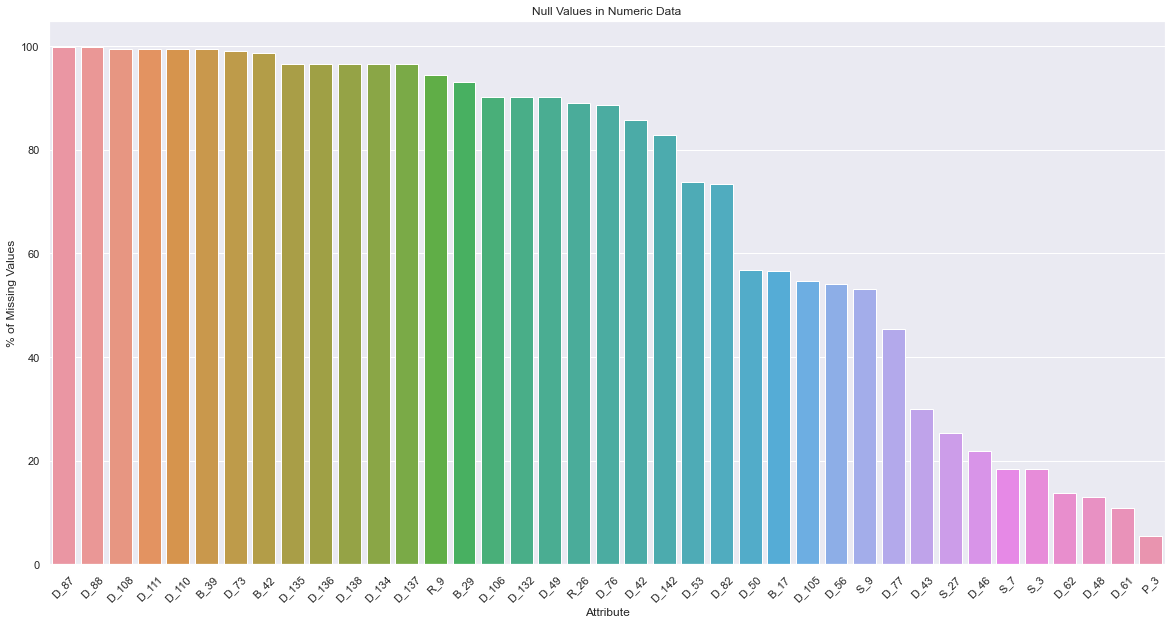

In [27]:
#nulss above limit
pctNulls = 5
numericNulls = numericNulls[numericNulls > pctNulls]

#To DF
numericNullsDf = numericNulls.to_frame(name = 'numericNulls')
numericNullsDf = numericNullsDf.sort_values('numericNulls',\
                                            ascending=False)

# figure for missing values
sns.set_theme(style="darkgrid")
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=numericNullsDf.index,\
                 y=numericNullsDf.numericNulls,\
                 data=numericNullsDf)

ax.set(title='Null Values in Numeric Data')
ax.set(xlabel="Attribute", ylabel='% of Missing Values')

plt.xticks(rotation=45)
plt.show()

In [28]:
print('Number of columns with nulls above ' + \
      str(pctNulls) + '% is -> ' + str(numericNulls.shape[0]))

Number of columns with nulls above 5% is -> 39


In [29]:
#Limit of nulls aceptable
x = 20
numericNullsDf_aboveXpct = numericNullsDf[numericNullsDf > x].dropna()
cols2Drop = numericNullsDf_aboveXpct.index
cols2Drop

Index(['D_87', 'D_88', 'D_108', 'D_111', 'D_110', 'B_39', 'D_73', 'B_42',
       'D_135', 'D_136', 'D_138', 'D_134', 'D_137', 'R_9', 'B_29', 'D_106',
       'D_132', 'D_49', 'R_26', 'D_76', 'D_42', 'D_142', 'D_53', 'D_82',
       'D_50', 'B_17', 'D_105', 'D_56', 'S_9', 'D_77', 'D_43', 'S_27', 'D_46'],
      dtype='object')

In [30]:
#Drop variables with to many nulls
train_data_numeric_clean = train_data_numeric.drop(columns= cols2Drop)
train_data_numeric_clean

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_44,B_4,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
0,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,0.005554,0.007046,0.003595,...,0.008312,0.009348,0.009336,0.009804,0.003616,0.006932,0.008604,0.003723,0.008369,0.007014
1,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,0.000992,0.006304,0.004767,...,0.004321,0.004523,0.000205,0.004224,0.001690,0.006082,0.009000,0.002809,0.002951,0.006065
2,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,0.005814,0.000072,0.001716,...,0.009662,0.007592,0.005379,0.000345,0.007555,0.006555,0.002374,0.003539,0.002715,0.000628
3,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,0.008613,0.009497,0.001131,...,0.006505,0.009659,0.004786,0.006044,0.008696,0.009739,0.008215,0.001343,0.008787,0.006253
4,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,0.003384,0.007952,0.002677,...,0.006998,0.000802,0.008492,0.009327,0.003995,0.003113,0.009419,0.009438,0.000763,0.003817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.845592,0.008302,0.027152,0.810376,0.000362,0.093131,0.006670,0.003630,NaN,0.022773,...,0.005133,0.007144,0.005419,0.004626,0.007781,0.000709,0.002118,0.003699,0.000433,0.005024
1382858,0.512331,0.066719,0.258766,0.054134,0.009598,0.141616,0.003534,0.329521,0.375819,0.641524,...,1.000931,0.007631,0.008373,0.009802,0.003375,0.002814,0.004659,0.009982,0.004349,0.007805
1382859,0.972914,0.598166,0.044332,1.004104,0.001686,0.137311,0.006085,0.004180,0.008611,0.081884,...,0.002539,0.003318,0.005751,0.003204,0.005686,0.007714,0.005633,0.000416,0.002774,0.000848
1382860,0.116854,0.622150,0.150316,0.055931,1.003595,0.220425,0.280979,0.236893,0.002689,0.069254,...,0.003857,0.009134,0.008296,0.001512,1.004266,0.006791,0.861576,1.009716,0.008985,0.100165


In [31]:
#Correlation Matrix
corr = train_data_numeric_clean.corr().abs()

In [32]:
#Top Correlations
topCorr = corr.unstack().sort_values(ascending=False)

topCorrDF = topCorr.to_frame()
topCorrDF.reset_index(inplace=True)
topCorrDF['Keep'] = topCorrDF['level_0'] != topCorrDF['level_1'] 
topCorrDF = topCorrDF[topCorrDF['Keep']]
topCorrDF.head()

,level_0,level_1,0,Keep
144,D_104,D_103,0.999750,True
145,D_103,D_104,0.999750,True
146,D_139,D_143,0.999503,True
147,D_143,D_139,0.999503,True
148,D_141,D_139,0.998176,True


In [33]:
#High Corrlated values
topCorrDFHC = topCorrDF[topCorrDF[0] > 0.85]
topCorrDFHC.head()

,level_0,level_1,0,Keep
144,D_104,D_103,0.999750,True
145,D_103,D_104,0.999750,True
146,D_139,D_143,0.999503,True
147,D_143,D_139,0.999503,True
148,D_141,D_139,0.998176,True


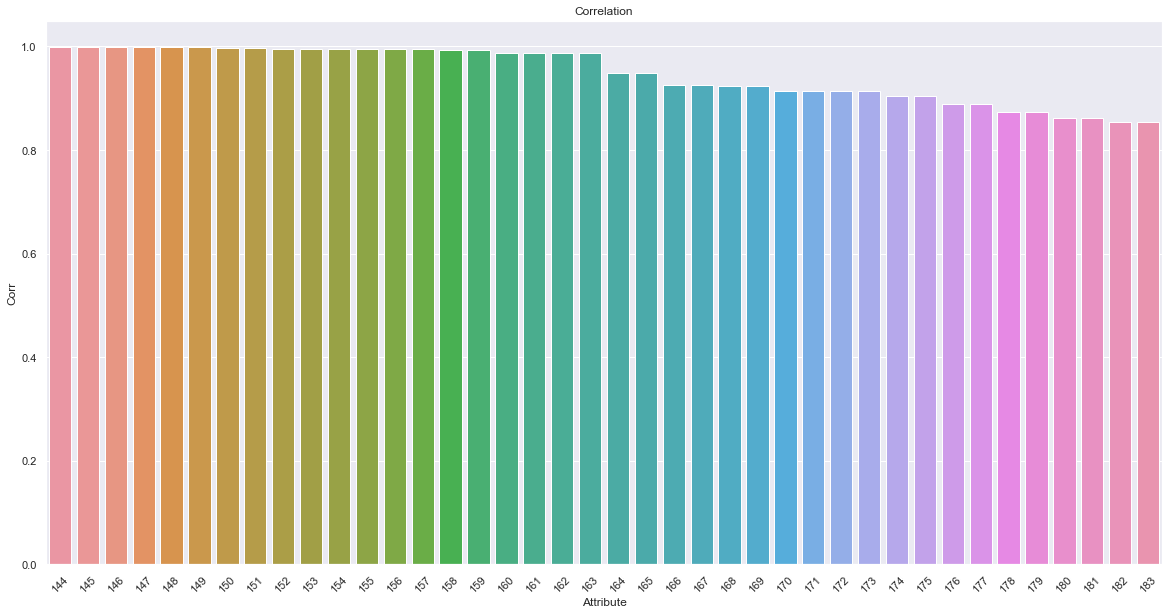

In [34]:
# figure for corrlations
sns.set_theme(style="darkgrid")
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=topCorrDFHC.index,\
                 y=topCorrDFHC[0],\
                 data=topCorrDFHC)

ax.set(title='Correlation')
ax.set(xlabel="Attribute", ylabel='Corr')

plt.xticks(rotation=45)
plt.show()

In [35]:

#Column to identify which attributes to remove
topCorrDFHC['Running'] = np.arange(len(topCorrDFHC))
topCorrDFHC.head()

/var/folders/06/rkc92dl925n9zc06g826mq2m0000gn/T/ipykernel_36349/3351179226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCorrDFHC['Running'] = np.arange(len(topCorrDFHC))


,level_0,level_1,0,Keep,Running
144,D_104,D_103,0.999750,True,0
145,D_103,D_104,0.999750,True,1
146,D_139,D_143,0.999503,True,2
147,D_143,D_139,0.999503,True,3
148,D_141,D_139,0.998176,True,4


In [36]:
#Remove pair for high correaltions
topCorrDFHC = topCorrDFHC[topCorrDFHC.index%2==0]
topCorrDFHC.head()

,level_0,level_1,0,Keep,Running
144,D_104,D_103,0.999750,True,0
146,D_139,D_143,0.999503,True,2
148,D_141,D_139,0.998176,True,4
150,D_143,D_141,0.997699,True,6
152,B_1,B_11,0.995150,True,8


In [37]:
#Drop variables with high correlation 
train_data_numeric_clean_HC = \
train_data_numeric_clean.drop(columns= topCorrDFHC.level_0)
train_data_numeric_clean_HC

,P_2,D_39,B_2,R_1,S_3,D_41,B_3,D_44,B_4,D_45,...,D_127,D_128,D_129,B_41,D_130,D_133,R_28,D_140,D_144,D_145
0,0.927437,0.007716,0.811036,0.001816,0.145747,0.005826,0.005554,0.007046,0.003595,0.348216,...,0.005891,0.999197,0.003513,0.000191,0.008312,0.009336,0.009804,0.006932,0.008369,0.007014
1,0.931875,0.009972,0.812552,0.004969,NaN,0.008166,0.000992,0.006304,0.004767,0.332139,...,0.004523,1.004878,0.003063,0.005348,0.004321,0.000205,0.004224,0.006082,0.002951,0.006065
2,0.936455,0.036248,0.818884,0.006339,NaN,0.008284,0.005814,0.000072,0.001716,0.324494,...,0.001921,1.007721,0.006351,0.007839,0.009662,0.005379,0.000345,0.006555,0.002715,0.000628
3,0.925237,0.002328,0.818650,0.001289,NaN,0.007104,0.008613,0.009497,0.001131,0.331189,...,0.000439,1.004477,0.007785,0.003993,0.006505,0.004786,0.006044,0.009739,0.008787,0.006253
4,0.853476,0.000166,0.811090,0.004103,NaN,0.009790,0.003384,0.007952,0.002677,0.324480,...,0.000594,1.004422,0.007107,0.001722,0.006998,0.008492,0.009327,0.003113,0.000763,0.003817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.845592,0.008302,0.810376,0.000362,0.093131,0.006670,0.003630,NaN,0.022773,0.368010,...,0.009727,1.007972,0.005755,0.001860,0.005133,0.005419,0.004626,0.000709,0.000433,0.005024
1382858,0.512331,0.066719,0.054134,0.009598,0.141616,0.003534,0.329521,0.375819,0.641524,0.435235,...,0.000268,0.003284,0.009343,0.004794,1.000931,0.008373,0.009802,0.002814,0.004349,0.007805
1382859,0.972914,0.598166,1.004104,0.001686,0.137311,0.006085,0.004180,0.008611,0.081884,0.360534,...,1.000708,1.008807,1.001783,0.000180,0.002539,0.005751,0.003204,0.007714,0.002774,0.000848
1382860,0.116854,0.622150,0.055931,1.003595,0.220425,0.280979,0.236893,0.002689,0.069254,0.040806,...,0.009075,1.003412,0.001548,0.005271,0.003857,0.008296,0.001512,0.006791,0.008985,0.100165


In [38]:
Delinquency = train_data_numeric_clean_HC.filter(regex='D')
Delinquency.head()

,D_39,D_41,D_44,D_45,D_47,D_51,D_52,D_54,D_55,D_59,...,D_124,D_125,D_127,D_128,D_129,D_130,D_133,D_140,D_144,D_145
0,0.007716,0.005826,0.007046,0.348216,0.437152,0.338425,0.085716,1.005512,0.084903,0.190308,...,0.417637,0.005207,0.005891,0.999197,0.003513,0.008312,0.009336,0.006932,0.008369,0.007014
1,0.009972,0.008166,0.006304,0.332139,0.414193,0.338711,0.067642,1.001352,0.076574,0.197170,...,0.411424,0.004669,0.004523,1.004878,0.003063,0.004321,0.000205,0.006082,0.002951,0.006065
2,0.036248,0.008284,0.000072,0.324494,0.412530,0.674811,0.069150,1.001763,0.041513,0.191624,...,0.416215,0.008313,0.001921,1.007721,0.006351,0.009662,0.005379,0.006555,0.002715,0.000628
3,0.002328,0.007104,0.009497,0.331189,0.419392,0.333561,0.072370,1.006742,0.076164,0.196232,...,0.417629,0.008866,0.000439,1.004477,0.007785,0.006505,0.004786,0.009739,0.008787,0.006253
4,0.000166,0.009790,0.007952,0.324480,0.414314,0.007849,0.076771,1.002273,0.044080,0.212465,...,0.414663,0.003300,0.000594,1.004422,0.007107,0.006998,0.008492,0.003113,0.000763,0.003817


In [39]:
Risk = train_data_numeric_clean_HC.filter(regex='R')
Risk.head()

,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_10,R_11,...,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_27,R_28
0,0.001816,0.005267,0.000566,0.003863,0.003794,0.005836,0.001745,0.007641,0.003388,0.003193,...,0.008905,0.007869,0.000512,0.009444,0.004845,0.003680,0.004030,0.007216,1.003566,0.009804
1,0.004969,0.007144,0.006327,0.006690,0.001448,0.008679,0.000844,0.007513,0.007760,0.002804,...,0.002470,0.001594,0.004812,0.009102,0.001306,0.004127,0.000649,0.000610,1.004596,0.004224
2,0.006339,0.005210,0.005189,0.005847,0.005555,0.002762,0.007501,0.008590,0.008538,0.005557,...,0.004027,0.000699,0.005103,0.001572,0.001301,0.002380,0.004914,0.003509,1.003659,0.000345
3,0.001289,0.000881,0.009568,0.007400,0.000563,0.001345,0.001551,0.004509,0.005019,0.003071,...,0.005800,0.009467,0.009737,0.000186,0.003067,0.004646,0.001667,0.002449,1.006008,0.006044
4,0.004103,0.001229,0.004567,0.001142,0.008566,0.005811,0.007596,0.000561,0.009778,0.009828,...,0.007027,0.007410,0.006567,0.008661,0.001624,0.009825,0.003906,0.008204,1.003585,0.009327


In [40]:
Spend = train_data_numeric_clean_HC.filter(regex='S')
Spend.head()

,S_3,S_5,S_6,S_8,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_23,S_24,S_25,S_26
0,0.145747,0.003528,0.005266,0.007254,0.283605,0.184960,0.006857,0.500016,0.001128,0.008803,0.008414,0.003294,0.001176,0.135217,0.085993,0.972734,0.131747
1,NaN,0.000460,1.004810,0.008651,0.283105,0.193651,0.006956,0.507256,0.007411,0.003645,0.009632,0.000978,0.009187,0.138668,0.080681,0.973617,0.003286
2,NaN,0.004163,1.002047,0.001198,0.280177,0.187360,0.006521,0.500443,0.007053,0.000816,0.004506,0.007588,0.005576,0.131437,0.078178,0.972992,0.006164
3,NaN,0.000023,1.000946,0.001126,0.281328,0.190375,0.008087,0.503831,0.004857,0.002596,0.001758,0.001603,0.000187,0.136478,0.077141,0.977601,0.006570
4,NaN,0.000231,1.004210,0.006380,0.289012,0.187626,0.003540,0.507549,0.003510,0.004459,0.006631,0.007878,0.007313,0.132373,0.081172,0.974066,0.001461


In [41]:
Payment = train_data_numeric_clean_HC.filter(regex='P')
Payment.head()

,P_2,P_3,P_4
0,0.927437,0.614372,0.009294
1,0.931875,0.661083,0.006046
2,0.936455,0.642370,0.006453
3,0.925237,0.605320,0.005708
4,0.853476,0.320957,0.004725


In [42]:
Balance = train_data_numeric_clean_HC.filter(regex='B')
Balance.head()

,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,...,B_24,B_25,B_26,B_27,B_28,B_31,B_32,B_36,B_40,B_41
0,0.811036,0.005554,0.003595,0.014009,0.234899,0.004260,0.006726,0.002579,0.300766,0.009206,...,0.003467,0.001469,0.002674,0.004865,0.005436,1,0.009863,0.007179,0.004068,0.000191
1,0.812552,0.000992,0.004767,0.019218,1.606071,0.003096,0.003430,0.000535,0.242152,0.002702,...,0.008110,0.000928,0.002376,0.002007,0.006327,1,0.002248,0.001450,0.000967,0.005348
2,0.818884,0.005814,0.001716,0.006214,1.498918,0.025083,0.003865,0.012890,0.245102,0.007328,...,0.000261,0.013181,0.000249,0.005574,0.005810,1,0.008849,0.003007,0.004868,0.007839
3,0.818650,0.008613,0.001131,0.001992,1.101752,0.007718,0.003073,0.000048,0.237745,0.006608,...,0.008629,0.007850,0.007262,0.000329,0.004361,1,0.001486,0.002611,0.007164,0.003993
4,0.811090,0.003384,0.002677,0.008312,1.512151,0.007893,0.008659,0.000022,0.242148,0.009096,...,0.003916,0.002482,0.007450,0.001761,0.008077,1,0.003386,0.004988,0.004885,0.001722


In [43]:
Delinquency.describe()

,D_39,D_41,D_44,D_45,D_47,D_51,D_52,D_54,D_55,D_59,...,D_124,D_125,D_127,D_128,D_129,D_130,D_133,D_140,D_144,D_145
count,1.382862e+06,1.382343e+06,1.314187e+06,1.382343e+06,1.382862e+06,1.382862e+06,1.375332e+06,1.382343e+06,1.336385e+06,1.356345e+06,...,1.338969e+06,1.338969e+06,1.382862e+06,1.357631e+06,1.357631e+06,1.357631e+06,1.372203e+06,1.372721e+06,1.372696e+06,1.357631e+06
mean,1.531865e-01,5.978309e-02,1.183263e-01,2.522715e-01,4.070805e-01,1.450472e-01,1.800181e-01,9.846189e-01,2.984100e-01,3.622595e-01,...,3.054065e-01,8.434663e-02,1.076544e-01,5.842846e-01,4.400195e-01,2.013225e-01,4.633224e-02,2.667208e-02,5.233069e-02,6.257268e-02
std,2.700303e-01,2.026389e-01,2.209929e-01,2.424714e-01,2.345539e-01,2.423010e-01,1.737084e-01,1.411792e-01,2.888014e-01,1.928901e-01,...,2.258255e-01,2.919139e-01,3.035181e-01,4.931275e-01,4.957618e-01,3.972370e-01,1.726495e-01,1.456421e-01,1.823715e-01,1.942993e-01
min,1.566353e-08,3.440668e-09,5.852338e-09,1.563241e-08,-2.662164e-02,3.237604e-08,-7.016962e-03,-2.004074e-03,3.427949e-07,-9.476952e-02,...,-4.545360e-02,9.315131e-09,1.006008e-09,1.570215e-08,2.234409e-08,3.227763e-09,6.380582e-10,3.725073e-09,1.969412e-08,3.798210e-09
25%,4.542409e-03,2.876825e-03,3.824994e-03,5.474150e-02,2.323029e-01,3.646169e-03,7.388487e-02,1.002342e+00,5.715389e-02,2.349013e-01,...,1.405653e-01,2.695765e-03,2.788662e-03,5.947510e-03,4.434334e-03,3.109250e-03,2.719222e-03,2.557001e-03,2.749556e-03,3.025997e-03
50%,9.068117e-03,5.744923e-03,7.663912e-03,1.812016e-01,3.831662e-01,7.282906e-03,1.444413e-01,1.004893e+00,1.822235e-01,3.783441e-01,...,2.741785e-01,5.396823e-03,5.572799e-03,1.000426e+00,8.855433e-03,6.222280e-03,5.434812e-03,5.112718e-03,5.498853e-03,6.049355e-03
75%,2.366801e-01,8.614322e-03,1.319283e-01,3.734026e-01,5.614375e-01,3.360348e-01,2.330062e-01,1.007452e+00,5.017720e-01,4.678712e-01,...,4.166230e-01,8.098632e-03,8.355970e-03,1.004737e+00,1.004247e+00,9.329784e-03,8.163627e-03,7.663891e-03,8.257057e-03,9.083035e-03
max,5.362196e+00,8.988807e+00,4.005466e+00,1.602639e+00,1.638956e+00,2.676518e+00,1.010000e+00,1.010000e+00,2.736358e+00,2.125230e+00,...,2.826254e+00,1.000773e+01,1.010000e+00,1.021384e+00,1.010000e+00,1.023141e+00,1.509998e+00,1.010000e+00,1.343329e+00,4.827630e+00


# Modeling

***

## Logistic Reegresion

In [44]:
#Delcare X Variables

#Concat cataagorical variables
X1 = pd.concat([train_data_numeric_clean_HC,train_data_Cat_dum], axis = 1) 

#Fill Nan with mean
X1 = X1.fillna(X1.mean())

#Add constant
X1 = sm.add_constant(X1)
X1

,const,P_2,D_39,B_2,R_1,S_3,D_41,B_3,D_44,B_4,...,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U
0,1.0,0.927437,0.007716,0.811036,0.001816,0.145747,0.005826,0.005554,0.007046,0.003595,...,0,1,0,0,0,0,0,1,0,0
1,1.0,0.931875,0.009972,0.812552,0.004969,0.225872,0.008166,0.000992,0.006304,0.004767,...,0,1,0,0,0,0,0,1,0,0
2,1.0,0.936455,0.036248,0.818884,0.006339,0.225872,0.008284,0.005814,0.000072,0.001716,...,0,1,0,0,0,0,0,1,0,0
3,1.0,0.925237,0.002328,0.818650,0.001289,0.225872,0.007104,0.008613,0.009497,0.001131,...,0,1,0,0,0,0,0,1,0,0
4,1.0,0.853476,0.000166,0.811090,0.004103,0.225872,0.009790,0.003384,0.007952,0.002677,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,1.0,0.845592,0.008302,0.810376,0.000362,0.093131,0.006670,0.003630,0.118326,0.022773,...,0,1,0,0,0,0,0,0,1,0
1382858,1.0,0.512331,0.066719,0.054134,0.009598,0.141616,0.003534,0.329521,0.375819,0.641524,...,0,0,1,0,0,0,0,0,1,0
1382859,1.0,0.972914,0.598166,1.004104,0.001686,0.137311,0.006085,0.004180,0.008611,0.081884,...,0,0,1,0,0,0,0,1,0,0
1382860,1.0,0.116854,0.622150,0.055931,1.003595,0.220425,0.280979,0.236893,0.002689,0.069254,...,0,1,0,0,0,0,0,0,0,1


In [45]:
#Logictic Regression
logreg01 = sm.Logit(y, X1).fit()
logreg01.summary2()

Optimization terminated successfully.
         Current function value: 0.286588
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.489      
Dependent Variable: target           AIC:              792910.4323
Date:               2022-08-09 20:31 BIC:              794658.5442
No. Observations:   1382862          Log-Likelihood:   -3.9631e+05
Df Model:           143              LL-Null:          -7.7607e+05
Df Residuals:       1382718          LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
         Coef.   Std.Err.      z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------
const    1.0207 43669.3352    0.0000 1.0000 -85589.3035 85591.3449
P_2     -3.3856     0.0248 -136.6621 0.0000     -3.4341    -3.3370
D_39     0.4153     0.0122   33.9987 0.0000      0.3913     0.4392
B_2     -0.4313     0.0130  -33.2043 0.0000     -0.4568    -0.4058
R_1      0.5577     0.0336   16.5801 0.0000      0.4918     0.6237
S_3      0.9543     0.0173   55.1353 0.0000      0.9204     0.9882
D_41     0.4442     0.0217   20.4314 0.0000      0.4016     0.4868
B_3      0.6844     0.0203   33.6826 0.0000      0.6446     0.7242
D_44     0.4810     0.0211   22.7517 0.0000      0.4396     0.5224
B_4      1.3188     0.0220   59.8912 0.0000      1.2757     1.3620
D_45    -0.3629     0.0262  -13.8325 0.0000     -0.4143    -0.3115
B_5     -0.1486     0.0167   -8.9154 0.0000     -0.1813    -0.1159
R_2      0.0878     0.0288    3.0473 0.0023      0.0313     0.1443
D_47    -0.7937     0.0214  -37.1331 0.0000     -0.8356    -0.7518
B_6     -0.0731     0.0109   -6.7183 0.0000     -0.0944    -0.0518
B_7      0.3720     0.0187   19.8973 0.0000      0.3354     0.4086
B_8      0.4220     0.0100   42.3470 0.0000      0.4024     0.4415
D_51    -1.2771     0.0306  -41.7081 0.0000     -1.3371    -1.2171
B_9      0.1729     0.0130   13.3452 0.0000      0.1475     0.1983
R_3      1.0917     0.0169   64.5791 0.0000      1.0586     1.1249
D_52    -0.1844     0.0204   -9.0262 0.0000     -0.2244    -0.1443
P_3      0.2273     0.0195   11.6420 0.0000      0.1890     0.2655
B_10    -0.0007     0.0008   -0.8954 0.3706     -0.0023     0.0009
S_5      0.0447     0.0070    6.4220 0.0000      0.0311     0.0584
B_11     0.6694     0.0206   32.5350 0.0000      0.6291     0.7098
S_6      0.0637     0.0095    6.7224 0.0000      0.0451     0.0822
D_54    -0.3130     0.0212  -14.7609 0.0000     -0.3546    -0.2715
R_4     -0.0067     0.0396   -0.1705 0.8646     -0.0843     0.0708
B_12    -0.0581     0.0154   -3.7695 0.0002     -0.0884    -0.0279
S_8     -0.2948     0.0223  -13.2359 0.0000     -0.3385    -0.2512
D_55    -0.0237     0.0193   -1.2258 0.2203     -0.0615     0.0142
B_13     0.0914     0.0124    7.3431 0.0000      0.0670     0.1158
R_5      0.0560     0.0515    1.0885 0.2764     -0.0449     0.1569
B_14     0.3702     0.0245   15.0976 0.0000      0.3221     0.4182
D_59    -0.1266     0.0166   -7.6251 0.0000     -0.1592    -0.0941
D_60     0.1015     0.0130    7.7778 0.0000      0.0759     0.1270
D_61     0.3513     0.0153   23.0130 0.0000      0.3214     0.3812
S_11    -0.5047     0.0181  -27.9280 0.0000     -0.5402    -0.4693
D_62    -1.1384     0.0302  -37.6332 0.0000     -1.1976    -1.0791
D_65     0.0511     0.0093    5.4892 0.0000      0.0329     0.0694
B_16     0.1228     0.0140    8.7801 0.0000      0.0954     0.1503
B_19     0.0556     0.0165    3.3712 0.0007      0.0233     0.0879
S_12     0.1535     0.0119   12.8470 0.0000      0.1301     0.1769
R_6      0.0084     0.0058    1.4348 0.1514     -0.0031     0.0198
S_13     0.2863     0.0175   16.3733 0.0000      0.2520     0.3205
B_21     0.0165     0.0059    2.8177 0.0048      0.0050     0.0280
D_69     0.0002     0.00

In [46]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [47]:
summaryDF = results_summary_to_dataframe(logreg01)
summaryDF

,coeff,pvals,conf_lower,conf_higher
const,1.020704,9.999814e-01,-85589.303515,85591.344923
P_2,-3.385586,0.000000e+00,-3.434141,-3.337031
D_39,0.415256,2.332391e-253,0.391317,0.439194
B_2,-0.431301,9.342380e-242,-0.456760,-0.405843
R_1,0.557722,9.702245e-62,0.491793,0.623651
...,...,...,...,...
D_63_XZ,0.024628,9.999996e-01,-85590.299591,85590.348847
D_64_-1,-0.284642,2.558802e-14,-0.357866,-0.211417
D_64_O,-0.428321,5.349955e-192,-0.456724,-0.399919
D_64_R,-0.369785,1.866924e-129,-0.399725,-0.339845


In [48]:
summaryDF_05 = summaryDF[summaryDF.pvals > 0.02]
summaryDF_05.index

Index(['const', 'B_10', 'R_4', 'D_55', 'R_5', 'R_6', 'D_69', 'D_71', 'D_72',
       'R_7', 'R_10', 'B_27', 'R_13', 'R_15', 'R_17', 'R_18', 'B_31', 'S_19',
       'R_20', 'D_89', 'D_92', 'R_25', 'S_25', 'D_107', 'D_109', 'B_40',
       'B_30', 'B_38', 'D_116', 'D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL',
       'D_63_XM', 'D_63_XZ'],
      dtype='object')

In [49]:
#X2 is X1 - col with los high P Value
X2 = X1.drop(columns=['const', 'B_10', 'R_4', 'D_55', 'R_5', 'R_6', 'D_69', 'D_71', 'D_72',
       'R_7', 'R_10', 'B_27', 'R_13', 'R_15', 'R_17', 'R_18', 'B_31', 'S_19',
       'R_20', 'D_89', 'D_92', 'R_25', 'S_25', 'D_107', 'D_109', 'B_40',
       'B_30', 'B_38', 'D_116', 'D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL',
       'D_63_XM', 'D_63_XZ'])

In [50]:
#Logictic Regression with significant variables 
logreg02 = sm.Logit(y, X2).fit()
logreg02.summary2()

Optimization terminated successfully.
         Current function value: 0.287029
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.489      
Dependent Variable: target           AIC:              794062.2394
Date:               2022-08-09 20:31 BIC:              795397.6026
No. Observations:   1382862          Log-Likelihood:   -3.9692e+05
Df Model:           109              LL-Null:          -7.7607e+05
Df Residuals:       1382752          LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
P_2          -3.3465    0.0234  -142.7190  0.0000  -3.3924  -3.3005
D_39          0.4505    0.0121    37.1276  0.0000   0.4267   0.4742
B_2          -0.3529    0.0123   -28.6618  0.0000  -0.3770  -0.3288
R_1           0.5160    0.0182    28.3085  0.0000   0.4803   0.5517
S_3           1.0051    0.0173    58.2160  0.0000   0.9712   1.0389
D_41          0.5128    0.0212    24.2199  0.0000   0.4713   0.5543
B_3           0.7133    0.0202    35.3398  0.0000   0.6737   0.7528
D_44          0.4675    0.0200    23.3383  0.0000   0.4283   0.5068
B_4           1.3339    0.0219    60.9491  0.0000   1.2910   1.3768
D_45         -0.1134    0.0251    -4.5173  0.0000  -0.1625  -0.0642
B_5          -0.1610    0.0164    -9.7951  0.0000  -0.1932  -0.1288
R_2           0.1278    0.0232     5.5100  0.0000   0.0823   0.1732
D_47         -0.7987    0.0213   -37.4226  0.0000  -0.8405  -0.7569
B_6          -0.0733    0.0108    -6.7603  0.0000  -0.0945  -0.0520
B_7           0.3740    0.0186    20.1554  0.0000   0.3376   0.4103
B_8           0.4660    0.0098    47.7170  0.0000   0.4469   0.4852
D_51         -1.2651    0.0275   -46.0070  0.0000  -1.3190  -1.2112
B_9           0.1216    0.0120    10.1593  0.0000   0.0981   0.1451
R_3           1.1265    0.0168    67.1604  0.0000   1.0936   1.1594
D_52         -0.1659    0.0202    -8.2050  0.0000  -0.2056  -0.1263
P_3           0.2846    0.0188    15.1267  0.0000   0.2477   0.3214
S_5           0.0485    0.0071     6.8681  0.0000   0.0346   0.0623
B_11          0.6643    0.0204    32.4982  0.0000   0.6243   0.7044
S_6           0.0689    0.0092     7.5126  0.0000   0.0509   0.0869
D_54         -0.2025    0.0195   -10.3792  0.0000  -0.2408  -0.1643
B_12         -0.0665    0.0153    -4.3580  0.0000  -0.0964  -0.0366
S_8          -0.2169    0.0218    -9.9527  0.0000  -0.2596  -0.1742
B_13          0.0922    0.0125     7.3864  0.0000   0.0677   0.1167
B_14          0.4242    0.0240    17.7065  0.0000   0.3773   0.4712
D_59         -0.0063    0.0162    -0.3882  0.6979  -0.0381   0.0255
D_60          0.1670    0.0125    13.3712  0.0000   0.1426   0.1915
D_61          0.4139    0.0138    29.8995  0.0000   0.3868   0.4411
S_11         -0.4269    0.0177   -24.1154  0.0000  -0.4615  -0.3922
D_62         -1.1269    0.0298   -37.8178  0.0000  -1.1853  -1.0685
D_65          0.0738    0.0096     7.6808  0.0000   0.0550   0.0926
B_16          0.1407    0.0130    10.8148  0.0000   0.1152   0.1662
B_19          0.0009    0.0149     0.0632  0.9496  -0.0282   0.0301
S_12          0.1654    0.0120    13.7352  0.0000   0.1418   0.1890
S_13          0.3207    0.0170    18.8368  0.0000   0.2873   0.3540
B_21          0.0144    0.0058     2.4789  0.0132   0.0030   0.0258
B_22          0.1669    0.0165    10.0894  0.0000   0.1345   0.1994
D_70          0.4208    0.0142    29.6590  0.0000   0.3930   0.4486
S_15          0.2718    0.0231    11.7460  0.0000   0.2265   0.3172
P_4           0.4142    0.0097    42.6342  0.0000   0.3951   0.4332
D_75         -0.0695    0.0233    -2.9806  0.0029  -0.1153  -0.0238
B_24          0.1697    0.0131    12.9101  

In [51]:
#Feature ranking with recursive feature elimination (RFE) to determine the top 15 variables
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)         # running RFE with 15 variables as output
rfe = rfe.fit(X2, y)

list(zip(X2.columns, rfe.support_, rfe.ranking_))

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/salvadorsanchez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y 

[('P_2', True, 1),
 ('D_39', False, 7),
 ('B_2', False, 3),
 ('R_1', False, 9),
 ('S_3', True, 1),
 ('D_41', True, 1),
 ('B_3', True, 1),
 ('D_44', False, 6),
 ('B_4', True, 1),
 ('D_45', False, 50),
 ('B_5', False, 54),
 ('R_2', False, 62),
 ('D_47', True, 1),
 ('B_6', False, 69),
 ('B_7', False, 23),
 ('B_8', False, 2),
 ('D_51', True, 1),
 ('B_9', False, 56),
 ('R_3', True, 1),
 ('D_52', False, 48),
 ('P_3', False, 28),
 ('S_5', False, 81),
 ('B_11', True, 1),
 ('S_6', False, 85),
 ('D_54', False, 26),
 ('B_12', False, 71),
 ('S_8', False, 13),
 ('B_13', False, 70),
 ('B_14', False, 17),
 ('D_59', False, 79),
 ('D_60', False, 53),
 ('D_61', False, 18),
 ('S_11', False, 11),
 ('D_62', True, 1),
 ('D_65', False, 68),
 ('B_16', False, 64),
 ('B_19', False, 92),
 ('S_12', False, 45),
 ('S_13', False, 12),
 ('B_21', False, 91),
 ('B_22', False, 49),
 ('D_70', False, 19),
 ('S_15', False, 47),
 ('P_4', False, 15),
 ('D_75', False, 65),
 ('B_24', False, 58),
 ('B_25', False, 55),
 ('B_26',

In [52]:
#Top Columns
col_Top = X2.columns[rfe.support_]
col_Top

Index(['P_2', 'S_3', 'D_41', 'B_3', 'B_4', 'D_47', 'D_51', 'R_3', 'B_11',
       'D_62', 'D_79', 'R_21', 'R_23', 'B_36', 'D_121'],
      dtype='object')

In [53]:
#X3 is Top variables
X3 = sm.add_constant(X2[col_Top])
X3.head()

,const,P_2,S_3,D_41,B_3,B_4,D_47,D_51,R_3,B_11,D_62,D_79,R_21,R_23,B_36,D_121
0,1.0,0.927437,0.145747,0.005826,0.005554,0.003595,0.437152,0.338425,0.000566,0.009206,0.185682,0.005871,0.009444,0.003680,0.007179,0.748820
1,1.0,0.931875,0.225872,0.008166,0.000992,0.004767,0.414193,0.338711,0.006327,0.002702,0.190654,0.005198,0.009102,0.004127,0.001450,0.733869
2,1.0,0.936455,0.225872,0.008284,0.005814,0.001716,0.412530,0.674811,0.005189,0.007328,0.190654,0.003704,0.001572,0.002380,0.003007,0.734708
3,1.0,0.925237,0.225872,0.007104,0.008613,0.001131,0.419392,0.333561,0.009568,0.006608,0.190654,0.009150,0.000186,0.004646,0.002611,0.731811
4,1.0,0.853476,0.225872,0.009790,0.003384,0.002677,0.414314,0.007849,0.004567,0.009096,0.190654,0.005711,0.008661,0.009825,0.004988,0.727713


In [54]:
#Logictic Regression
logreg03 = sm.Logit(y, X3).fit()
logreg03.summary2()

Optimization terminated successfully.
         Current function value: 0.301836
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: target           AIC:              834827.5356
Date:               2022-08-09 20:49 BIC:              835021.7702
No. Observations:   1382862          Log-Likelihood:   -4.1740e+05
Df Model:           15               LL-Null:          -7.7607e+05
Df Residuals:       1382846          LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     0.7741     0.0126     61.4320   0.0000    0.7494    0.7988
P_2      -4.7180     0.0172   -274.7356   0.0000   -4.7517   -4.6844
S_3       1.5001     0.0152     98.6343   0.0000    1.4703    1.5299
D_41      1.1479     0.0150     76.6279   0.0000    1.1185    1.1772
B_3       0.8190     0.0145     56.6591   0.0000    0.7906    0.8473
B_4       1.5677     0.0134    116.5968   0.0000    1.5413    1.5941
D_47     -1.7603     0.0189    -93.1599   0.0000   -1.7974   -1.7233
D_51     -1.6137     0.0199    -80.9840   0.0000   -1.6528   -1.5747
R_3       1.7054     0.0137    124.3903   0.0000    1.6786    1.7323
B_11      1.0757     0.0155     69.5718   0.0000    1.0454    1.1060
D_62     -2.0586     0.0271    -75.9555   0.0000   -2.1117   -2.0055
D_79      0.8186     0.0112     73.3207   0.0000    0.7967    0.8404
R_21      0.8437     0.0193     43.6179   0.0000    0.8058    0.8816
R_23      1.3445     0.1325     10.1472   0.0000    1.0848    1.6042
B_36      2.7308     0.1019     26.8046   0.0000    2.5311    2.9305
D_121     0.6449     0.0161     39.9922   0.0000    0.6133    0.6765
==================================================================

"""

In [61]:
# Getting the predicted values on the train set
y_pred01 = logreg01.predict(X1)
y_pred02 = logreg02.predict(X2)
y_pred03 = logreg03.predict(X3)
y_pred01

0          0.008542
1          0.009914
2          0.006074
3          0.010421
4          0.017589
             ...   
1382857    0.019923
1382858    0.478632
1382859    0.006175
1382860    0.846270
1382861    0.029302
Length: 1382862, dtype: float64

In [62]:
prediction01 = (y_pred01 > 0.5).astype('int')
prediction01 = prediction01.to_frame('y_predict')

prediction02 = (y_pred02 > 0.5).astype('int')
prediction02 = prediction02.to_frame('y_predict')

prediction03 = (y_pred03 > 0.5).astype('int')
prediction03 = prediction03.to_frame('y_predict')

prediction01

,y_predict
0,0
1,0
2,0
3,0
4,0
...,...
1382857,0
1382858,0
1382859,0
1382860,1


In [63]:
#More libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [64]:
def ModelEval(y, prediction):
    cm= confusion_matrix(y, prediction01)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp = disp.plot(include_values=True,\
                     cmap='viridis'\
                     , xticks_rotation='horizontal')
    plt.grid(False)
    plt.show()

    report = classification_report(y,\
                                   prediction, \
                                   digits=3, \
                                   output_dict=True)
    reportDF = pd.DataFrame(report).T
    reportDF = round(reportDF,3)
    reportDF['support'] = reportDF['support'].astype('int')
    return reportDF

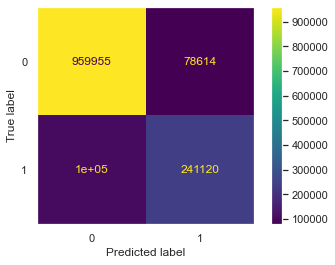

,precision,recall,f1-score,support
0,0.903,0.924,0.914,1038569
1,0.754,0.700,0.726,344293
accuracy,0.869,0.869,0.869,0
macro avg,0.829,0.812,0.820,1382862
weighted avg,0.866,0.869,0.867,1382862


In [65]:
reprot1 = ModelEval(y,prediction01)
reprot1

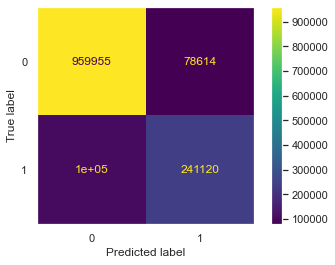

,precision,recall,f1-score,support
0,0.902,0.925,0.913,1038569
1,0.755,0.698,0.725,344293
accuracy,0.868,0.868,0.868,0
macro avg,0.829,0.812,0.819,1382862
weighted avg,0.866,0.868,0.867,1382862


In [66]:
reprot2 = ModelEval(y,prediction02)
reprot2

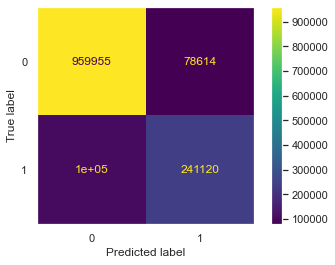

,precision,recall,f1-score,support
0,0.895,0.923,0.909,1038569
1,0.744,0.674,0.707,344293
accuracy,0.861,0.861,0.861,0
macro avg,0.819,0.799,0.808,1382862
weighted avg,0.857,0.861,0.859,1382862


In [67]:
reprot3 = ModelEval(y,prediction03)
reprot3

## c5.0 Model

In [68]:
#Add Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [69]:
#Initiate Decision tree
amexmodel=DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=6)

In [70]:
#Fit tree
amexmodel.fit(X1,y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=6)

testing

In [71]:
#Predict 
amexc5predict = amexmodel.predict(X1)

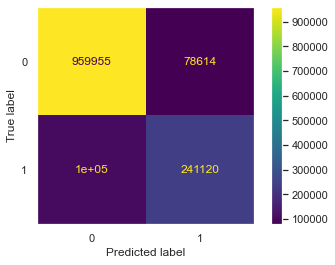

,precision,recall,f1-score,support
0,0.922,0.848,0.884,1038569
1,0.631,0.783,0.699,344293
accuracy,0.832,0.832,0.832,0
macro avg,0.777,0.816,0.791,1382862
weighted avg,0.850,0.832,0.838,1382862


In [72]:
#Evaluation
C50Report = ModelEval(y,amexc5predict)
C50Report

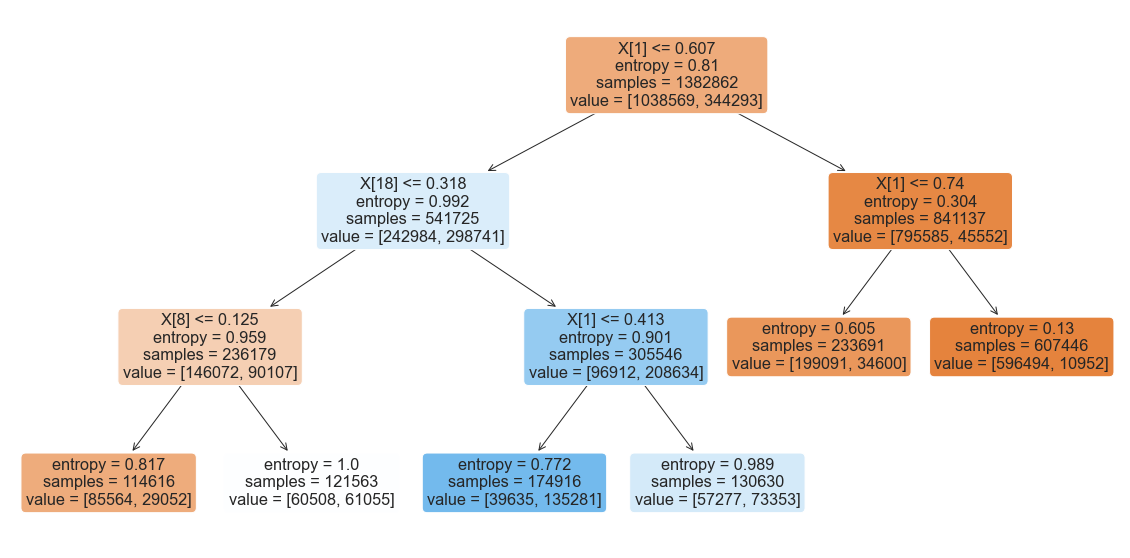

In [73]:
from sklearn.tree import plot_tree

#Figure size
plt.figure(figsize=(20,10))

#Plot tree
plot_tree(amexmodel, \
          filled=True, rounded = True)
plt.show()

## Cart

In [74]:
#Initiate Decision tree
amexmodelcart=DecisionTreeClassifier(criterion='gini', max_depth=6, max_leaf_nodes=6)

In [75]:
#Fit tree
amexmodelcart.fit(X1,y)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=6)

In [76]:
#Predict 
amexcartpredict = amexmodelcart.predict(X1)

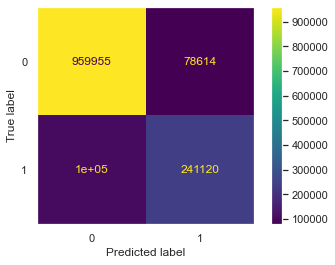

,precision,recall,f1-score,support
0,0.907,0.879,0.893,1038569
1,0.665,0.728,0.695,344293
accuracy,0.841,0.841,0.841,0
macro avg,0.786,0.803,0.794,1382862
weighted avg,0.847,0.841,0.843,1382862


In [77]:
#Evaluation
CartReport = ModelEval(y,amexcartpredict)
CartReport

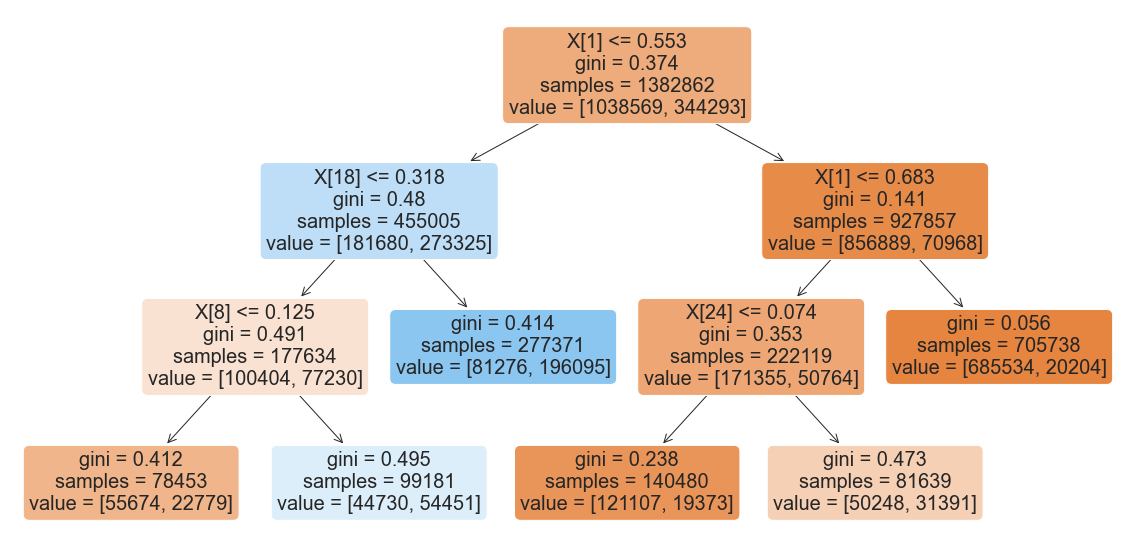

In [78]:
#Figure size
plt.figure(figsize=(20,10))

#Plot tree
plot_tree(amexmodelcart, \
          filled=True, rounded = True)
plt.show()

## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfy = np.ravel(y)

In [80]:
#Grow the forest
rf01 = RandomForestClassifier(n_estimators = 20, criterion="gini", max_depth=6)

In [81]:
#Fit forest
rf01.fit(X1,rfy)

RandomForestClassifier(max_depth=6, n_estimators=20)

In [82]:
#Predict 
rfpredictions = rf01.predict(X1)

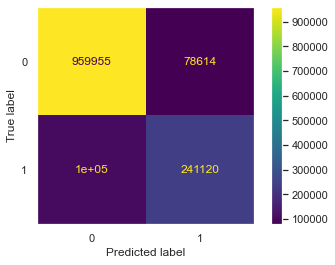

,precision,recall,f1-score,support
0,0.893,0.921,0.907,1038569
1,0.736,0.667,0.700,344293
accuracy,0.858,0.858,0.858,0
macro avg,0.815,0.794,0.803,1382862
weighted avg,0.854,0.858,0.855,1382862


In [83]:
#Evaluation
ForestReport = ModelEval(y,rfpredictions)
ForestReport

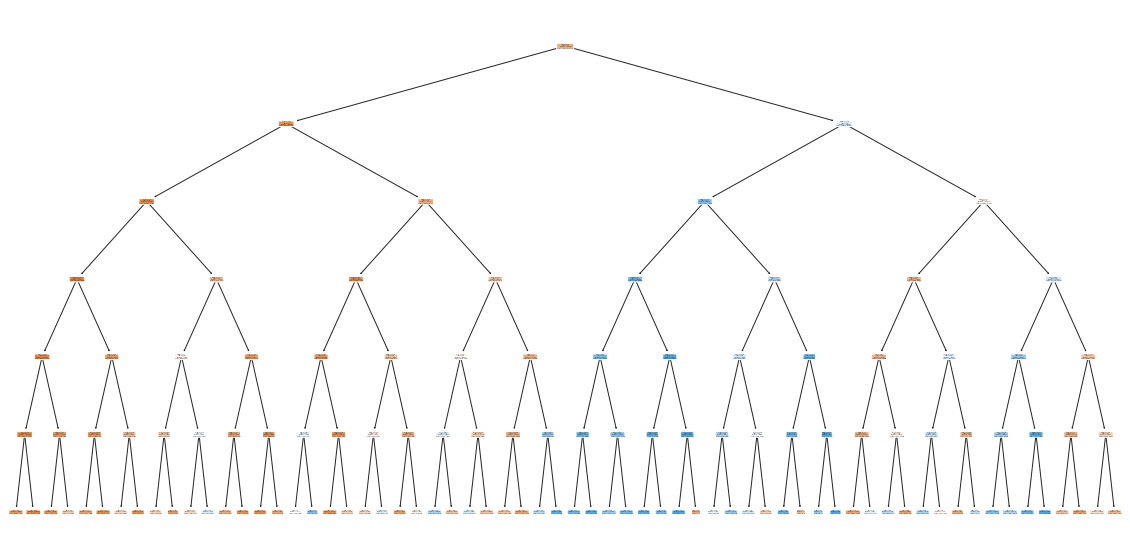

In [84]:
#Figure size
plt.figure(figsize=(20,10))

#Base estimator, single tree from forest
baseTree = rf01.estimators_[0]

#Plot tree
plot_tree(baseTree, \
          filled=True, rounded = True)
plt.show()

## XBoost